
### Афинные преобразования — это класс геометрических преобразований, которые сохраняют прямые линии, параллельность и отношения расстояний между точками на одной прямой (но не обязательно сами расстояния и углы). Они описываются линейными преобразованиями, объединёнными с переносом.

Примеры афинных преобразований:

- Сдвиг (перенос);
- Масштабирование;
- Поворот;
- Отражение;
- Сдвиг (shear).

Ниже представлена функция, которая на вход принимает изображение, матрицу преобразования, и возвращает преобразованный результат и выводит его на экран.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def warp_affine(image, M, output_shape):
    """
    Применяет афинное преобразование к изображению.

    Параметры:
        image: numpy.ndarray
            Входное изображение.
        M: numpy.ndarray
            Матрица афинного преобразования 3x3.
        output_shape: tuple
            Размер выходного изображения в формате (rows, cols, channels).

    Возвращает:
        numpy.ndarray
            Изображение после афинного преобразования.
    """
    rows, cols, *_ = image.shape  # Определяем размеры исходного изображения
    out_rows, out_cols, *_ = output_shape # Определяем размеры выходного изображения

    # Создаем пустой массив для результата
    output = np.zeros(output_shape, dtype=image.dtype)

    # Итерируемся по каждому пикселю выходного изображения
    for out_row in range(out_rows):
        for out_col in range(out_cols):
            # Преобразуем координаты пикселя из выходного пространства в входное
            in_col, in_row, _ = np.dot(M, [out_col, out_row, 1]).astype(int)

            # Проверяем, находятся ли преобразованные координаты внутри границ входного изображения
            if 0 <= in_row < rows and 0 <= in_col < cols:
                # Копируем значение пикселя из входного изображения в выходное
                output[out_row, out_col, :] = image[in_row, in_col, :]

    return output

In [ ]:
# загрузка картинки
image = plt.imread("street.jpg")

# угол поворота картинки
th = np.radians(-45)

# задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), np.sin(th), 400],
    [-np.sin(th), np.cos(th), 250],
    [0,0,0]],
)

In [4]:
# задаем размеры входного изображения
shape = (image.shape[0] + 400, image.shape[1] + 400, image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

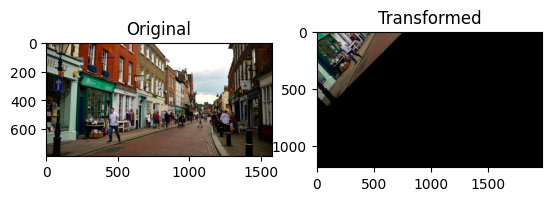

In [5]:
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result)
plt.tight_layout
plt.show()

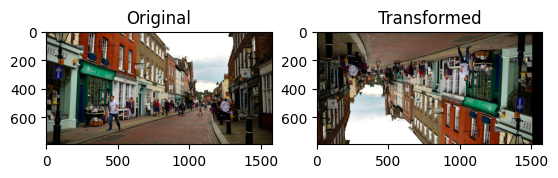

In [6]:
# пример переворота изображения

# угол поворота картинки
th = np.radians(-180)

# задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), np.sin(th), 1500],
    [-np.sin(th), np.cos(th), 800],
    [0,0,0]],
)

# задаем размеры входного изображения
shape = (image.shape[0], image.shape[1], image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result)
plt.tight_layout
plt.show()

# ДЗ: с помощью функции warp_affine() преобразуйте представленное изображение 4-мя различными способами:
- Полный переворот сверху-вниз;
- Поворот на 90 градусов против часовой стрелки;
- Зеркальное отображение относительно оси-0Y;
- Растяжение по OX в два раза и растяжение по 0Y два раза;

Для выполнения подбирайте правильно параметры выходного изображения также как и элементы матрицы преобразований M, чтобы все преобразованное изображение помещалось в выходном графике.

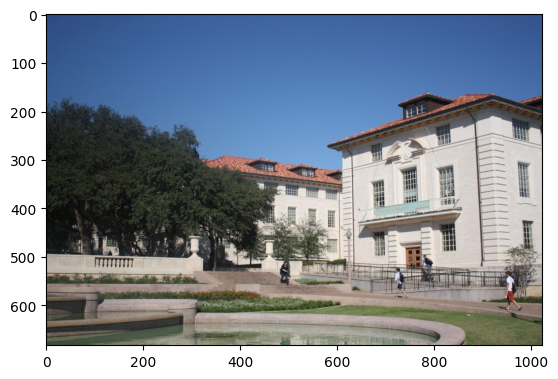

In [9]:
path_to_image = "street_2.jpeg"

# загрузка картинки
image = plt.imread(path_to_image)

plt.imshow(image)
plt.tight_layout
plt.show()

- Полный переворот сверху-вниз

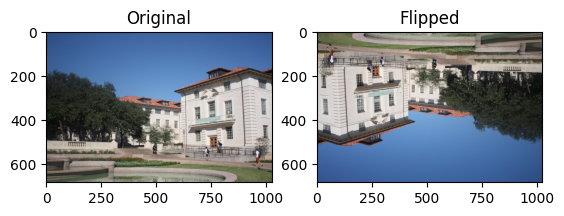

In [ ]:
# угол поворота картинки
th = np.radians(180)

# высота и ширина 
height, width = image.shape[:2]

# задаем матрицу поворота
M = np.float32(
    [[np.cos(th), np.sin(th), width],
    [-np.sin(th), np.cos(th), height],
    [0,0,0]],
)

# задаем размеры выходного изображения
shape = (height, width, image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

# результат
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Flipped")
plt.imshow(result)
plt.tight_layout
plt.show()

- Поворот на 90 градусов против часовой стрелки

683 1024


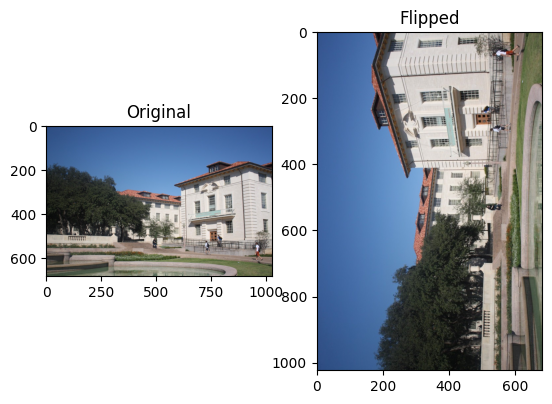

In [48]:
th = np.radians(-90)

height, width = image.shape[:2]
print(height, width)

# задаем матрицу поворота
M = np.array([
    [np.cos(th), np.sin(th), width], 
    [-np.sin(th), np.cos(th), 0], 
    [0, 0, 1]
], dtype=np.float32)

# задаем размеры выходного изображения
output_shape = (width, height, image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, output_shape)

# результат
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Flipped")
plt.imshow(result)
plt.show()

- Зеркальное отображение относительно оси-0Y

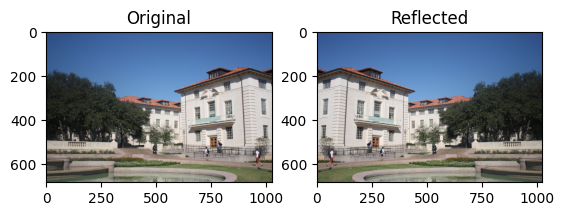

In [61]:
th = np.radians(-90)

height, width = image.shape[:2]

# задаем матрицу отражения
M = np.array([
    [-1,0, width],  
    [0, 1, 0],  
    [0, 0, 1]
], dtype=np.float32)

# задаем размеры выходного изображения
shape = (height, width, image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

# результат
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Reflected")
plt.imshow(result)
plt.show()

- Растяжение по OX в два раза и растяжение по 0Y два раза

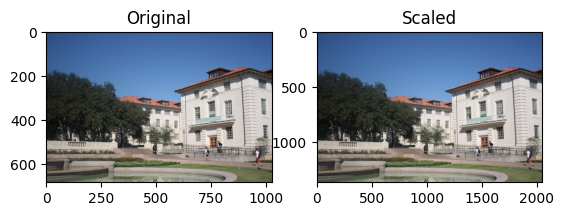

In [ ]:
th = np.radians(-90)

height, width = image.shape[:2]

# задаем матрицу растяжения
M = np.array([
    [0.5,0, 0],  
    [0, 0.5, 0],  
    [0, 0, 1]
], dtype=np.float32)

# задаем размеры выходного изображения
shape = (height*2, width*2, image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

# Отображаем результат
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Scaled")
plt.imshow(result)
plt.show()